In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import  cv2
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from torchvision import transforms
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio

# Specify the path to the MATLAB file in your Google Drive
mat_file_path = '/content/drive/MyDrive/imagelabels.mat'

# Load the MATLAB file
mat_data = sio.loadmat(mat_file_path)

# Access the labels
print(mat_data.keys())

# Access the labels
labels = mat_data['labels']

# Count the number of unique labels
unique_labels = np.unique(labels)
num_unique_labels = len(unique_labels)

# Print the number of unique labels
print("Number of unique labels:", num_unique_labels)

print(labels[labels==1])

dict_keys(['__header__', '__version__', '__globals__', 'labels'])
Number of unique labels: 102
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
import numpy as np
labels_flat = np.ravel(labels)
label_index_dict = {}

for i in range(len(labels_flat)):
    label = labels_flat[i]
    if label in label_index_dict:
        label_index_dict[label].append(i+1)
    else:
        label_index_dict[label] = [i+1]

In [ ]:
label = 102

index_list = label_index_dict[label]

print(index_list)

[8000, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8043, 8044, 8045, 8046, 8047]


In [ ]:
!unzip '/content/drive/MyDrive/102flowers.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/102flowers/jpg/image_03190.jpg  
  inflating: /content/102flowers/jpg/image_03191.jpg  
  inflating: /content/102flowers/jpg/image_03192.jpg  
  inflating: /content/102flowers/jpg/image_03193.jpg  
  inflating: /content/102flowers/jpg/image_03194.jpg  
  inflating: /content/102flowers/jpg/image_03195.jpg  
  inflating: /content/102flowers/jpg/image_03196.jpg  
  inflating: /content/102flowers/jpg/image_03197.jpg  
  inflating: /content/102flowers/jpg/image_03198.jpg  
  inflating: /content/102flowers/jpg/image_03199.jpg  
  inflating: /content/102flowers/jpg/image_03200.jpg  
  inflating: /content/102flowers/jpg/image_03201.jpg  
  inflating: /content/102flowers/jpg/image_03202.jpg  
  inflating: /content/102flowers/jpg/image_03203.jpg  
  inflating: /content/102flowers/jpg/image_03204.jpg  
  inflating: /content/102flowers/jpg/image_03205.jpg  
  inflating: /content/102flowers/jpg/image_03206.jpg  
  inflating: /

In [ ]:
# Specify the path to the image dataset folder
image_folder_path = '/content/102flowers/jpg'

# Get the list of image filenames
image_filenames = os.listdir(image_folder_path)

# Sort the image filenames
sorted_image_filenames = sorted(image_filenames)

print(sorted_image_filenames)

['image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg', 'image_00006.jpg', 'image_00007.jpg', 'image_00008.jpg', 'image_00009.jpg', 'image_00010.jpg', 'image_00011.jpg', 'image_00012.jpg', 'image_00013.jpg', 'image_00014.jpg', 'image_00015.jpg', 'image_00016.jpg', 'image_00017.jpg', 'image_00018.jpg', 'image_00019.jpg', 'image_00020.jpg', 'image_00021.jpg', 'image_00022.jpg', 'image_00023.jpg', 'image_00024.jpg', 'image_00025.jpg', 'image_00026.jpg', 'image_00027.jpg', 'image_00028.jpg', 'image_00029.jpg', 'image_00030.jpg', 'image_00031.jpg', 'image_00032.jpg', 'image_00033.jpg', 'image_00034.jpg', 'image_00035.jpg', 'image_00036.jpg', 'image_00037.jpg', 'image_00038.jpg', 'image_00039.jpg', 'image_00040.jpg', 'image_00041.jpg', 'image_00042.jpg', 'image_00043.jpg', 'image_00044.jpg', 'image_00045.jpg', 'image_00046.jpg', 'image_00047.jpg', 'image_00048.jpg', 'image_00049.jpg', 'image_00050.jpg', 'image_00051.jpg', 'image_00052.jpg', 'image_0005

/content/102flowers/jpg/image_02946.jpg
(500, 752, 3)
/content/102flowers/jpg/image_06026.jpg
(500, 667, 3)
/content/102flowers/jpg/image_04230.jpg
(502, 500, 3)
/content/102flowers/jpg/image_03859.jpg
(500, 750, 3)
/content/102flowers/jpg/image_05181.jpg
(500, 667, 3)
/content/102flowers/jpg/image_02824.jpg
(500, 752, 3)
/content/102flowers/jpg/image_03707.jpg
(500, 514, 3)
/content/102flowers/jpg/image_07480.jpg
(500, 649, 3)
/content/102flowers/jpg/image_06550.jpg
(500, 752, 3)
/content/102flowers/jpg/image_02585.jpg
(500, 631, 3)
/content/102flowers/jpg/image_02707.jpg
(500, 752, 3)
/content/102flowers/jpg/image_05367.jpg
(500, 679, 3)
/content/102flowers/jpg/image_05492.jpg
(500, 667, 3)
/content/102flowers/jpg/image_05512.jpg
(500, 667, 3)
/content/102flowers/jpg/image_00510.jpg
(500, 700, 3)
/content/102flowers/jpg/image_02985.jpg
(500, 666, 3)
/content/102flowers/jpg/image_01935.jpg
(500, 568, 3)
/content/102flowers/jpg/image_01566.jpg
(500, 667, 3)
/content/102flowers/jpg/imag

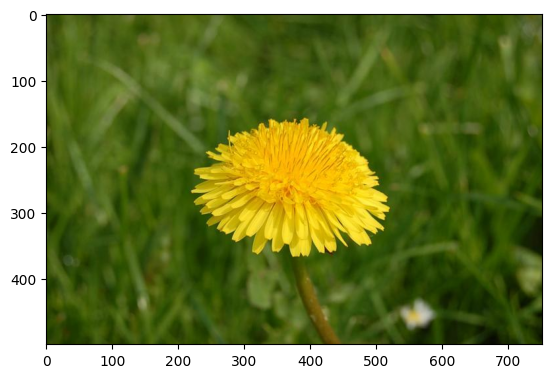

In [ ]:
for i,filename in enumerate(image_filenames):
  filepath=os.path.join(image_folder_path,filename)
  print(filepath)
  image = cv2.imread(filepath)
  if i==8:
    plt.imshow(image[:,:,::-1])
  print(image.shape)
  if i==100:
    break


In [ ]:
import os
import shutil


source_directory = '/content/102flowers/jpg'


destination_directory = '/content/drive/MyDrive/flowers'
os.makedirs(destination_directory, exist_ok=True)


images = os.listdir(source_directory)
images = sorted(images)


print(len(images))
print(len(labels[0]))

for indexlabel in range(len(labels[0])):
  label_directory = os.path.join(destination_directory, str(labels[0][indexlabel]))
  os.makedirs(label_directory,exist_ok=True)
  image_dir=os.path.join(source_directory,images[indexlabel])
  im1=cv2.imread(image_dir)
  resizeim=cv2.resize(im1,(224,224))
  cv2.imwrite(os.path.join(label_directory ,images[indexlabel]+'.'+'jpg'),resizeim)

8189
8189


In [ ]:
# Get the index array of elements equal to 2
indices = np.where(labels[0] == 1)

# Print the index array
print(indices)

(array([6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743,
       6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754,
       6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765,
       6766, 6767, 6768, 6769, 6770, 6771, 6772]),)


In [ ]:
import os
from natsort import natsorted

# Specify the path to the folder containing the subfolders
folder_path = '/content/drive/MyDrive/flowers'

# Get the list of subfolder names
folder_names = os.listdir(folder_path)

# Sort the folder names
sorted_folder_names = natsorted(folder_names)

# Iterate over each folder and sort its subfolders
for folder_name in sorted_folder_names:
    folder_subpath = os.path.join(folder_path, folder_name)
    subfolder_names = os.listdir(folder_subpath)
    sorted_subfolder_names = natsorted(subfolder_names)

In [ ]:
# Specify the path to the folder containing the subfolders
folder_path = '/content/drive/MyDrive/flowers'

# Specify the target number of images per folder
target_num_images = 250

# Get the list of subfolder names
folder_names = os.listdir(folder_path)

# Iterate over each folder and perform data augmentation
for folder_name in folder_names:
    folder_subpath = os.path.join(folder_path, folder_name)
    num_images = len(os.listdir(folder_subpath))

    if num_images < target_num_images:
        # Create an ImageDataGenerator instance with desired augmentation settings
        datagen = ImageDataGenerator(
            rotation_range=20,  # Rotate images randomly within the range [-20, 20] degrees
            width_shift_range=0.1,  # Shift the width of images randomly within the range [-0.1, 0.1] of the total width
            height_shift_range=0.1,  # Shift the height of images randomly within the range [-0.1, 0.1] of the total height
            shear_range=0.2,  # Apply shear transformation randomly within the range [-0.2, 0.2] radians
            zoom_range=0.2,  # Zoom images randomly within the range [0.8, 1.2]
            horizontal_flip=True,  # Flip images horizontally randomly
            fill_mode='nearest'  # Use the nearest pixel for filling newly created pixels
        )

        # Get the list of image file names in the folder
        image_names = os.listdir(folder_subpath)

        # Calculate the number of additional images needed
        num_additional_images = target_num_images - num_images

        # Generate additional images and save them to the folder
        for i in range(num_additional_images):
            # Select a random image file name from the list
            random_image_name = np.random.choice(image_names)

            # Load the image
            image = cv2.imread(os.path.join(folder_subpath, random_image_name))
            image = np.expand_dims(image, axis=0)

            # Generate an augmented image
            augmented_image = datagen.flow(image, batch_size=1)[0][0]

            # Save the augmented image
            new_image_name = f"augmented_{i}.jpg"
            augmented_image_path = os.path.join(folder_subpath, new_image_name)
            cv2.imwrite(augmented_image_path,augmented_image)

        print(f"Folder '{folder_name}': Number of images increased to {target_num_images}")
    else:
        print(f"Folder '{folder_name}': Number of images is already {target_num_images}")


Folder '77': Number of images is already 250
Folder '73': Number of images increased to 250
Folder '88': Number of images increased to 250
Folder '89': Number of images increased to 250
Folder '81': Number of images increased to 250
Folder '46': Number of images increased to 250
Folder '74': Number of images increased to 250
Folder '51': Number of images is already 250
Folder '44': Number of images increased to 250
Folder '82': Number of images increased to 250
Folder '83': Number of images increased to 250
Folder '78': Number of images increased to 250
Folder '80': Number of images increased to 250
Folder '75': Number of images increased to 250
Folder '41': Number of images increased to 250
Folder '43': Number of images increased to 250
Folder '76': Number of images increased to 250
Folder '84': Number of images increased to 250
Folder '58': Number of images increased to 250
Folder '56': Number of images increased to 250
Folder '86': Number of images increased to 250
Folder '60': Numb

<h2>Create LFW dataset for test</h2>

In [ ]:
directorycreate = '/content/drive/MyDrive/flowerDataset'
os.makedirs(directorycreate, exist_ok=True)

dir=['test','train','validation','validation-LFW']
for i in dir:
  mydir=os.path.join(directorycreate, i)
  os.makedirs(mydir, exist_ok=True)

In [ ]:
o = 0
print("ss_{}".format(o))

def LFWPOSTest():
  # Specify the parent folder path
  source_path = '/content/drive/MyDrive/flowers'
  dest_path='/content/drive/MyDrive/flowerDataset/test'
  l=0
  folders=os.listdir(source_path)
  # Filter the directories based on their names
  test_folders = [directory for directory in folders if 81 <= int(directory) <= 102]
  for filname in test_folders:
    images1=os.path.join(source_path,filname)
    images=os.listdir(images1)
    print(images)
    for im in range(len(images)):
      s1=cv2.imread(os.path.join(images1,images[im]))
      k=im+1
      if k>=len(images):
        k=0
      s2=cv2.imread(os.path.join(images1,images[k]))
      pair1=os.path.join(dest_path,"1_{}".format(l))
      l+=1
      os.makedirs(pair1,exist_ok=True)
      num1=f"source_{1}.jpg"
      num2=f"source_{2}.jpg"
      # print(os.path.join(pair1,num1))
      cv2.imwrite(os.path.join(pair1,num1),s1)
      cv2.imwrite(os.path.join(pair1,num2),s2)



LFWPOSTest()



ss_0
['image_00446.jpg.jpg', 'image_00447.jpg.jpg', 'image_00448.jpg.jpg', 'image_00449.jpg.jpg', 'image_00450.jpg.jpg', 'image_00451.jpg.jpg', 'image_00452.jpg.jpg', 'image_00453.jpg.jpg', 'image_00454.jpg.jpg', 'image_00455.jpg.jpg', 'image_00456.jpg.jpg', 'image_00457.jpg.jpg', 'image_00458.jpg.jpg', 'image_00459.jpg.jpg', 'image_00460.jpg.jpg', 'image_00461.jpg.jpg', 'image_00462.jpg.jpg', 'image_00463.jpg.jpg', 'image_00464.jpg.jpg', 'image_00465.jpg.jpg', 'image_00466.jpg.jpg', 'image_00467.jpg.jpg', 'image_00468.jpg.jpg', 'image_00469.jpg.jpg', 'image_00470.jpg.jpg', 'image_00471.jpg.jpg', 'image_00472.jpg.jpg', 'image_00473.jpg.jpg', 'image_00474.jpg.jpg', 'image_00475.jpg.jpg', 'image_00476.jpg.jpg', 'image_00477.jpg.jpg', 'image_00478.jpg.jpg', 'image_00479.jpg.jpg', 'image_00480.jpg.jpg', 'image_00481.jpg.jpg', 'image_00482.jpg.jpg', 'image_00483.jpg.jpg', 'image_00484.jpg.jpg', 'image_00485.jpg.jpg', 'image_00486.jpg.jpg', 'image_00487.jpg.jpg', 'image_00488.jpg.jpg', 'imag

In [ ]:
oo=os.listdir('/content/drive/MyDrive/flowerDataset/test')

print(len(oo))

11275


In [ ]:
def LFWNEGTest():
  # Specify the parent folder path
  source_path = '/content/drive/MyDrive/flowers'
  dest_path='/content/drive/MyDrive/flowerDataset/test'
  l=0

  image_paths = np.empty((0, 25), dtype=object)
  # Get the list of directories in the source directory
  folders = os.listdir(source_path)
  # Filter the directories based on their names
  test_folders = [directory for directory in folders if 81 <= int(directory) <= 102]

  # Iterate over the test folders
  for folder in test_folders:
      folder_path = os.path.join(source_path, folder)
      images = os.listdir(folder_path)

      # Choose random images from the folder
      random_images = random.sample(images, 25)

      # Append the image paths to the array
      folder_image_paths = [os.path.join(folder_path, image) for image in random_images]
      folder_image_paths = np.array(folder_image_paths, dtype=object).reshape(1, -1)
      image_paths = np.concatenate((image_paths, folder_image_paths), axis=0)
  for i in range(image_paths.shape[0]):
    for j in range(image_paths.shape[1]):
      im=cv2.imread(image_paths[i][j])
      for k in range(i+1,image_paths.shape[0]):
        im2=cv2.imread(image_paths[k][j])
        pair1=os.path.join(dest_path,"0_{}".format(l))
        l+=1
        os.makedirs(pair1,exist_ok=True)
        num1=f"source_{1}.jpg"
        num2=f"source_{2}.jpg"
        cv2.imwrite(os.path.join(pair1,num1),im)
        cv2.imwrite(os.path.join(pair1,num2),im2)

LFWNEGTest()

<h2>Create LFW dataset for validation</h2>

In [ ]:
import os
import random

# Specify the parent folder path
source_path = '/content/drive/MyDrive/flowers'
dest_path = '/content/drive/MyDrive/flowerDataset/test'

image_valid = []
image_train=[]

# Get the list of directories in the source directory
folders = os.listdir(source_path)

# Sort the folders using a custom sorting function
def sort_folders(folder):
    return int(folder)

folders = sorted(folders, key=sort_folders)
print(folders)
# Filter the directories based on their names
trainvalid_folders = [directory for directory in folders if 1 <= int(directory) <= 80]

# Iterate over the test folders
for folder in trainvalid_folders:
    folder_path = os.path.join(source_path, folder)
    images = os.listdir(folder_path)
    # Choose random images from the folder
    random_images = random.sample(images, 68)
    remaining_images = list(set(images) - set(random_images))

    # Append the image paths to the list
    folder_image_paths = [os.path.join(folder_path, image) for image in random_images]
    # Append the remaining image paths to another list
    folder_remaining_paths = [os.path.join(folder_path, image) for image in remaining_images]

    image_valid.append(folder_image_paths)
    image_train.append(folder_remaining_paths)

# Convert the list of lists to a NumPy array if needed
image_valid = np.array(image_valid, dtype=object)  # Optional
image_train=np.array(image_train,dtype=object)


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102']


In [ ]:
def validdataset(image_valid):
    destination_directory = '/content/drive/MyDrive/flowerDataset/validation'

    for indexlabel, valid_images in enumerate(image_valid, start=1):
        label_directory = os.path.join(destination_directory, str(indexlabel))
        os.makedirs(label_directory, exist_ok=True)

        for image_path in valid_images:
            im1 = cv2.imread(image_path)
            cv2.imwrite(os.path.join(label_directory, os.path.basename(image_path)),im1)

# Usage example:
validdataset(image_valid)

In [ ]:
oo=os.listdir('/content/drive/MyDrive/flowerDataset/validation/1')
print(len(oo))

68


In [ ]:
import shutil

def traindataset(image_train):
    destination_directory = '/content/drive/MyDrive/flowerDataset/train'

    for indexlabel, train_images in enumerate(image_train, start=1):
        label_directory = os.path.join(destination_directory, str(indexlabel))
        os.makedirs(label_directory, exist_ok=True)

        for image_path in train_images:
            im1 = cv2.imread(image_path)
            cv2.imwrite(os.path.join(label_directory, os.path.basename(image_path)),im1)

# Usage example:
traindataset(image_train)

In [3]:
o = 0
print("ss_{}".format(o))

def LFWPOSValid():
  # Specify the parent folder path
  source_path = '/content/drive/MyDrive/flowerDataset/validation'
  dest_path='/content/drive/MyDrive/flowerDataset/validation-LFW'
  l=0
  folders=os.listdir(source_path)
  for filname in folders:
    images1=os.path.join(source_path,filname)
    images=os.listdir(images1)
    print(images)
    for im in range(len(images)):
      s1=cv2.imread(os.path.join(images1,images[im]))
      k=im+1
      if k>=len(images):
        k=0
      s2=cv2.imread(os.path.join(images1,images[k]))
      pair1=os.path.join(dest_path,"1_{}".format(l))
      l+=1
      os.makedirs(pair1,exist_ok=True)
      num1=f"source_{1}.jpg"
      num2=f"source_{2}.jpg"
      # print(os.path.join(pair1,num1))
      cv2.imwrite(os.path.join(pair1,num1),s1)
      cv2.imwrite(os.path.join(pair1,num2),s2)



LFWPOSValid()

ss_0
['augmented_106.jpg', 'augmented_21.jpg', 'image_06751.jpg.jpg', 'augmented_184.jpg', 'augmented_82.jpg', 'augmented_51.jpg', 'augmented_57.jpg', 'augmented_68.jpg', 'image_06772.jpg.jpg', 'augmented_124.jpg', 'augmented_158.jpg', 'augmented_65.jpg', 'augmented_133.jpg', 'augmented_187.jpg', 'augmented_97.jpg', 'augmented_165.jpg', 'augmented_126.jpg', 'image_06763.jpg.jpg', 'augmented_74.jpg', 'augmented_66.jpg', 'augmented_108.jpg', 'augmented_131.jpg', 'augmented_196.jpg', 'augmented_157.jpg', 'augmented_206.jpg', 'augmented_160.jpg', 'augmented_140.jpg', 'augmented_141.jpg', 'augmented_194.jpg', 'augmented_149.jpg', 'image_06762.jpg.jpg', 'augmented_150.jpg', 'augmented_153.jpg', 'augmented_204.jpg', 'image_06742.jpg.jpg', 'augmented_168.jpg', 'augmented_185.jpg', 'augmented_4.jpg', 'augmented_95.jpg', 'augmented_71.jpg', 'augmented_138.jpg', 'augmented_76.jpg', 'augmented_40.jpg', 'augmented_18.jpg', 'augmented_137.jpg', 'augmented_83.jpg', 'augmented_55.jpg', 'augmented_125.

In [6]:
tt=os.listdir('/content/drive/MyDrive/flowerDataset/validation-LFW')

print(len(tt))

10881


In [5]:
def LFWNEGValid():
  # Specify the parent folder path
  source_path = '/content/drive/MyDrive/flowerDataset/validation'
  dest_path='/content/drive/MyDrive/flowerDataset/validation-LFW'
  l=0

  image_paths = np.empty((0, 2), dtype=object)
  # Get the list of directories in the source directory
  folders = os.listdir(source_path)

  # Iterate over the test folders
  for folder in folders:
      folder_path = os.path.join(source_path, folder)
      images = os.listdir(folder_path)

      # Choose random images from the folder
      random_images = random.sample(images, 2)

      # Append the image paths to the array
      folder_image_paths = [os.path.join(folder_path, image) for image in random_images]
      folder_image_paths = np.array(folder_image_paths, dtype=object).reshape(1, -1)
      image_paths = np.concatenate((image_paths, folder_image_paths), axis=0)
      t=False
  for i in range(image_paths.shape[0]):
    for j in range(image_paths.shape[1]):
      if t==True:
        break
      im=cv2.imread(image_paths[i][j])
      for k in range(i+1,image_paths.shape[0]):
        if l>5440:
          t=True
          break;
        im2=cv2.imread(image_paths[k][j])
        pair1=os.path.join(dest_path,"0_{}".format(l))
        l+=1
        os.makedirs(pair1,exist_ok=True)
        num1=f"source_{1}.jpg"
        num2=f"source_{2}.jpg"
        cv2.imwrite(os.path.join(pair1,num1),im)
        cv2.imwrite(os.path.join(pair1,num2),im2)

LFWNEGValid()